 # GIS GZ – Übung 1: Einstieg ins Projekt und Repetition von Python <span style="color:red">(Musterlösung)</span>

## Wichtiges zum Datenhandling
Heute arbeiten wir in Jupyter Notebook über die virtuelle Plattform mybinder.org. Damit Ihr Code bei einem Systemfehler nicht verloren geht, speichern Sie immer wieder ein Backup auf Ihre lokale Festplatte. Vergessen Sie am Schluss nicht, Ihre Dateien in Ihren persönlichen Ordner zu speichern. 

## Einleitung
In der heutigen Übung greifen Sie Ihre bisherigen Kenntnisse in Python auf. Dabei erstellen Sie erstens einen Glättungsalgorithmus, der Ihnen über eine Suchmatrix die Werte des Zentroiden glättet. Zweitens stellen Sie das Kinosterben in Zürich dar, indem Sie einen tabellarischen Datensatz laden und eine Funktion erstellen, die Ihnen ausgibt, wie viele Kinos in welchem Jahr offen waren. Dabei arbeiten Sie mit den libraries pandas (optional csv), numpy und matplotlib.

## Lernziele
* Sie können Vor- und Nachteile unterschiedlicher Datentypen gegeneinander abwägen.
* Sie können in Python libraries importieren, Daten laden und speichern, loops und if-statements durchführen, Variablen speichern und abrufen, Funktionen erstellen und Code debuggen.
* Sie können sich in einem Team organisieren und Aufgaben gemeinsam lösen.
* Freiwillig: Sie können eine eigene Python-Umgebung einrichten.

## Verwendete libraries und Funktionen

Zuerst importieren wir die nötigen libraries der heutigen Übung. Standardmässig verwenden wir für `numpy`, `pandas` und `matplotlib` Abkürzungen.

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point
from datetime import date

Anschliessend definieren wir eine Funktion, die Ihnen X- und Y-Werte als Plot ausgibt.

In [2]:
def show_points(df):
    """
    Shows the points passed with the data frame
    :param df: The data frame that contains the points that should be visualized
    :return:
    """

    # Plot the district map
    district_map = geopandas.read_file(os.path.join('data', 'stadtkreis.json'))
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_aspect('equal')
    district_map.plot(ax=ax, color='white', edgecolor='black')

    # Translate the points from the dataframe to Point objects, import them to a geodataframe with LV95 as source
    # CRS, project the geodataframe to WGS84 and display it
    geometry = [Point(xy) for xy in zip(df['X_LV95'], df['Y_LV95'])]
    gdf = geopandas.GeoDataFrame(df, geometry=geometry, crs={'init': 'epsg:2056'})
    gdf = gdf.to_crs({'init': 'epsg:4326'})
    gdf.plot(ax=ax, color='red')

    # Show the whole plot and return
    plt.draw()
    return

Zudem brauchen wir eine Funktion, die uns Rasterdaten anzeigt

In [3]:
def show_raster(array_1, array_2):
    """
    Visualizes two rasters next to each other
    :param array_1: The raster that should be displayed on the left
    :param array_2: The raster that should be displayed on the right
    :return:
    """

    # Create a figure with one row and two columns
    fig = plt.figure(figsize=(10, 20))

    # Add a first subplot on the left
    fig.add_subplot(121)
    plt.imshow(array_1)

    # Add another subplot on the right
    fig.add_subplot(122)
    plt.imshow(array_2)

    # Show the plot and return
    plt.show()
    return

## Aufgabe 1

Definieren Sie ein zweidimensionales numpy array mit 100 Spalten und 100 Zeilen und weisen Sie jeder Zelle einen zufälligen Ganzzahlenwert von 0 und 255 zu. 
$$0 \leq x \leq 255$$

Erstellen Sie ein zweites array in derselben Grösse und glätten Sie die Werte des ursprünglichen arrays, indem Sie pro Zelle den Mittelwert der 8 umliegenden Zellen und der Zentrumszelle berechnen und diesen Mittelwert der Zentrumszelle zuweisen. 
*Hinweis: Vergessen Sie dabei nicht, dass Zellen ausserhalb des numpy arrays liegen, nicht berücksichtigt werden dürfen.*

<img src="images/lattices_r1.png" alt="Image_01" style="width: 150px;"/>

Stellen Sie beide arrays mit der Funktion `show_raster` dar und beschreiben Sie die Unterschiede.

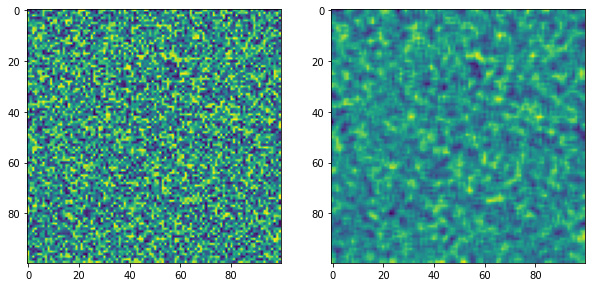

In [4]:
# Define a random integer array and copy it
numpy_array = np.random.randint(0, 256, size=(100, 100))
# smoothed_numpy_array = np.copy(numpy_array)
smoothed_numpy_array = np.zeros(shape=(100, 100))

# Define the searching range around the center cell
neighbor_rings = 1
values_range = range(-neighbor_rings, neighbor_rings + 1)

# Outer loop: iterate through cells in matrix
for i in range(numpy_array.shape[0]):
    for j in range(numpy_array.shape[1]):
        # val = smoothed_numpy_array[i, j]

        # Create an empty list for all values within the search matrix
        values_within_search_matrix = []

        # Run the inner loop and determine the searching position
        for i_1 in values_range:
            for j_1 in values_range:
                i_value = i + i_1
                j_value = j + j_1

                # Just consider the values within the matrix range
                if (0 <= i_value < numpy_array.shape[0]) and (0 <= j_value < numpy_array.shape[1]):
                    values_within_search_matrix.append(numpy_array[i_value, j_value])

        # Determine the average of the list and assign it to the centroid value of the copied array
        average_in_matrix = round(sum(values_within_search_matrix) / len(values_within_search_matrix), 0)
        smoothed_numpy_array[i, j] = average_in_matrix

# Show the rasters and return
show_raster(numpy_array, smoothed_numpy_array)

## Aufgabe 2

Laden Sie die `kinos.csv` entweder mit `csv` oder mit `pandas` in ein Datenobjekt. Wenden Sie einen Filter an, der Ihnen nur die Kinos anzeigt, die aktuell in Betrieb sind. Erzeugen Sie aus dieser Teilmenge einen Plot der X-, und Y-Koordinaten. In welchem Datum wurden die Koordinaten abgespeichert?

*Hinweis: Spaltennamen = `X_LV95`,`Y_LV95`.*
*Hinweis: Transformieren Sie den String mit dem Jahr in den datetime-Datentyp. Vielleicht könnte es auch nützlich sein, sich nur auf das Jahr zu beschränken.*

Gruppieren Sie anschliessend die Kinos nach der Kategorie `BisISO`. Erzeugen Sie einen 2D Scatterplot aller Kinos, die vor 1970 geschlossen wurden und einen Plot mit den restlichen Kinos, die 1970 und später geschlossen wurden.

Zusatzaufgabe: Erstellen Sie eine Funktion, in die Sie das Jahr eingeben und die Ihnen als Ausgabewert die Anzahl an Kinos angibt, die in diesem Jahr offen waren. 

<span style="color:orange">Dazu erstellen wir zuerst eine Funktion, die uns die Daten nach dem Jahr filtert.</span>

In [5]:
def filter_data_based_on_year(df, year):
    """
    Filters the content of a df based on the years, in which a cinema was opened
    :param df: The df that has to be filtered
    :param year: The year in which a cinema had to be opened
    :return: The filtered df
    """

    filtered_df = df[(df.VonISO <= year) & (year <= df.BisISO)]
    return filtered_df

<span style="color:orange">Anschliessend folgt die Hauptfunktion:</span>

C:\Users\jschito\Anaconda3\envs\gis_gz\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jschito\Anaconda3\envs\gis_gz\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


'\n# Show all cinemas by year\nfor year in range(first_year, last_year + 1):\n    filtered_df = filter_data_based_on_year(df, year)\n    show_points(filtered_df)\n'

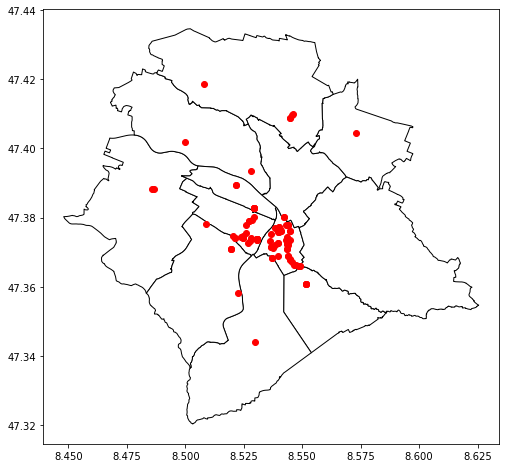

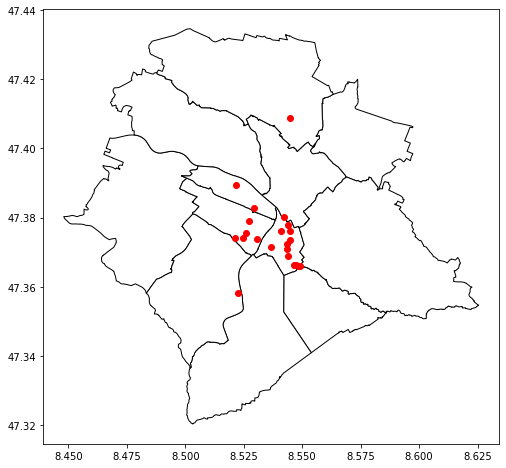

In [6]:
# Read the file, set the correct datetime type, and overwrite it with the years
# headers = ['X_LV95','Y_LV95','Adresse','Kinonamen_history','Kinonamen','VonISO','BisISO']
df = pd.read_csv(os.path.join('data', 'kinos.csv'))
years_from = pd.to_datetime(df['VonISO'])
years_to = pd.to_datetime(df['BisISO'])
df['VonISO'] = years_from.dt.year
df['BisISO'] = years_to.dt.year

# Determine the first and the last year. If the last year goes beyond the current year, set the current year
first_year = df['VonISO'].min()
last_year = df['VonISO'].max()
if last_year > date.today().year:
    last_year = date.today().year

# Show all cinemas over all years
show_points(df)

# Show all cinemas that were opened in 2010
filtered_df = filter_data_based_on_year(df, 2010)
show_points(filtered_df)

# Show all cinemas by year
# for year in range(first_year, last_year + 1):
#     filtered_df = filter_data_based_on_year(df, year)
#     show_points(filtered_df)


# Projekt
Formieren Sie sich in Dreiergruppen (oder Vierergruppen, wenn nicht anders möglich) und wählen Sie ein Thema oder erstellen Sie ein Konzept. Wichtig: Ihre Gruppe und Ihr Thema muss von der Übungsleitung abgesegnet werden, ehe Sie beginnen. Lesen Sie daher die Anforderungen an das Projekt nochmals genau durch. Definieren Sie den Arbeitsablauf ganz genau und überlegen Sie sich im Vornherein, welche Funktionen sich kombinieren lassen, um zu Ihrem gewünschten Resultat zu gelangen. Suchen Sie anschliessend nach den Daten (oder fragen Sie die Übungleitung).